# Data exploration 

In [1]:
# load libraries and set plot parameters
import numpy as np
import tools
import pandas as pd
import seaborn as sns

import matplotlib.pyplot  as plt
%matplotlib inline
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['font.size'] = 13
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Reading data

In [2]:
# Header
header = ['unit_id', 't']
header +=  [f'set_{i}' for i in range(1,4)]
header +=  [f'sensor_{i}' for i in range(1,22)]

# Reading
raw_train = pd.read_csv('../1. Data/train.txt',sep = '\s{1,2}',names= header, engine = 'python')
raw_test = pd.read_csv('../1. Data/test.txt',sep = '\s{1,2}',names= header, engine = 'python')
raw_final_test = pd.read_csv('../1. Data/final_test.txt',sep = '\s{1,2}',names= header, engine = 'python')

print('Train data shape',raw_train.shape)
print('Test data shape',raw_test.shape)
print('Final test data shape', raw_final_test.shape)

raw_train.head(5)

Train data shape (45918, 26)
Test data shape (29820, 26)
Final test data shape (55156, 26)


,unit_id,t,set_1,set_2,set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


In [3]:
raw_train.describe()

,unit_id,t,set_1,set_2,set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,...,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,109.396511,110.307396,24.008881,0.571251,49.172438,472.861677,579.596770,1419.947816,1205.669194,8.029878,...,265.943344,2334.185381,8065.548831,9.332433,0.023354,348.293915,2228.342654,97.741699,20.776822,12.466282
std,62.866193,68.420545,14.793676,0.310935,32.503659,26.460179,37.391068,106.286960,119.550936,3.627125,...,138.163656,128.426495,84.964099,0.751834,0.004722,27.837602,145.693883,5.378969,9.903697,5.941954
min,1.000000,1.000000,0.000000,0.000000,0.000000,445.000000,535.650000,1245.430000,1029.490000,3.910000,...,129.240000,2027.720000,7851.590000,8.325300,0.020000,303.000000,1915.000000,84.930000,10.230000,6.126600
25%,54.000000,53.000000,10.004500,0.250600,20.000000,445.000000,549.580000,1352.910000,1124.010000,3.910000,...,131.360000,2387.880000,8061.230000,8.676925,0.020000,331.000000,2212.000000,100.000000,10.840000,6.504600
50%,110.000000,106.000000,25.001500,0.700000,40.000000,462.540000,555.985000,1369.140000,1138.870000,7.050000,...,183.170000,2388.070000,8081.475000,9.314500,0.020000,335.000000,2223.000000,100.000000,14.870000,8.925200
75%,164.000000,160.000000,41.998100,0.840000,80.000000,491.190000,607.370000,1499.697500,1307.437500,10.520000,...,371.250000,2388.160000,8126.380000,9.390000,0.030000,369.000000,2324.000000,100.000000,28.470000,17.084200
max,218.000000,357.000000,42.008000,0.842000,100.000000,518.670000,644.430000,1614.660000,1442.360000,14.620000,...,523.460000,2390.740000,8274.880000,11.082600,0.030000,398.000000,2388.000000,100.000000,39.330000,23.590500


- Values seem quite different among them.
- Normalization is needed.

In [4]:
# Some useful column selection auxiliary variables

predictors = raw_train.columns[raw_train.columns.str.contains(pat = '[sen][set]', regex = True)]
sensors = raw_train.columns[raw_train.columns.str.contains(pat = 'sen', regex = True)]
settings = raw_train.columns[raw_train.columns.str.contains(pat = 'set', regex = True)]

## Dealing with test data

As specififed in the challenge description, the test set, the time series ends some time prior to complete degradation. Therefore, this data cannot be used for testing unless we use some data augmentation technique.

Another alternative is to split the training set itself for training, test, and validation purposes during algorithm development.

For now, as a first try, I will keep the second approach.

## Data normalization

According to the data description in the paper (“Damage Propagation Modeling for Aircraft Engine
Run-to-Failure Simulation”) the data is created according different operation conditions which can lead to very different sensor values.

Depending on the algorithms used for RUL prediction some preprocessing has to be done regarding sensor data and operational regimes. We have two options, either we normalize all sensor data disregarding the operation conditions we found, either we normalize sensor data based on their respective operating conditions.

### Operational Conditions

First let's see if we can find these different operation conditions.

For this we will use a simple clustering technique of the three settings (Kmeans). For this specific step, since setting data is available for train, test and final test data sets, we will concatenate all of them and try to find the patterns within the whole available data.

Text(0, 0.5, 'Clustering score')

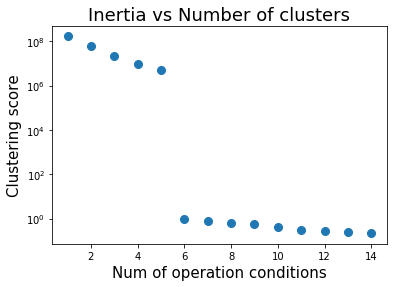

In [5]:
from sklearn.cluster import KMeans

# Concatenate train, test and final test data
raw_set = pd.concat([raw_train[settings],raw_test[settings],raw_final_test[settings]],
                     ignore_index=True)

# Running kmeans clustering for different ks. This is done to find the number of clusters that minimize inertia.
# (Sum of pairwise distances between data points and centroids)
# Here we assume that there will not be more than 15 operation conditions
kMeansVar = [KMeans(n_clusters=k, n_jobs = -1).fit(raw_set.values) for k in range(1, 15)]
inertias = [km.inertia_ for km in kMeansVar]

# Plot
plt.scatter(x = range(1,15), y= inertias)
plt.title("Inertia vs Number of clusters")
plt.yscale('log')
plt.xlabel('Num of operation conditions')
plt.ylabel('Clustering score')

- Undoubtedly, we have 6 operation settings (lower score, better)

Text(0.5, 0, 'Operation conditions index')

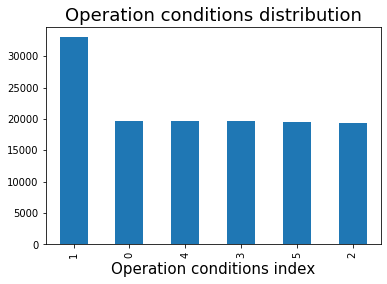

In [6]:
# Copy labels for the clustering with 6 operation conditions
raw_set["op_cond"] = pd.Series(kMeansVar[5].labels_)

# Op condition distribution
pd.Series(kMeansVar[5].labels_, name= 'op_cond').value_counts().plot.bar()
plt.title("Operation conditions distribution")
plt.xlabel("Operation conditions index")

- No rare operational condition. All seem pretty common.

In [7]:
raw_set[settings].describe()

,set_1,set_2,set_3
count,130894.000000,130894.000000,130894.000000
mean,24.022855,0.571752,49.077269
std,14.778342,0.310516,32.500167
min,0.000000,0.000000,0.000000
25%,10.004600,0.250600,20.000000
50%,25.001400,0.700000,40.000000
75%,41.998100,0.840000,80.000000
max,42.008000,0.842000,100.000000


- Set 1 -> Altitude in Kft
- Set 2 -> Mach number
- Set 3 -> Throttle Resolver Angle

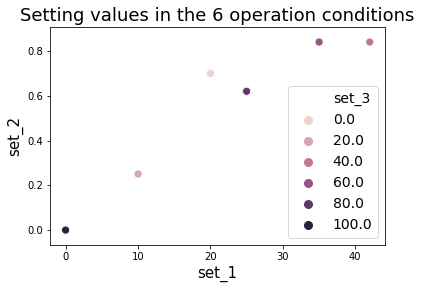

In [8]:
sns.scatterplot(data = raw_set, x = 'set_1', y = 'set_2', hue = 'set_3', legend = 'full')
plt.title("Setting values in the 6 operation conditions");

- These points seem to cover all flight phases. For example, on the left lower corner (take-off), on the right upper corner (cruise speed flight) and middle points either climbing or landing phase. 
- There is a single throttle angle for every set_1, set_2 point.

### Comparison: global sensor normalization vs operation point normalization

Let's exemplify the effects of both techniques

In [9]:
# add the labels to the original data set
train = raw_train.merge(pd.Series(kMeansVar[5].labels_, name= 'op_cond'),left_index = True, right_index = True)

First we are going to scale all the dataset at once disregarding operational conditions

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale train data substracting sensor mean and devide by its sd. (Except unit_id and t)
train_scaled = train.copy()
test_scaled = raw_test.copy()
final_test_scaled = raw_final_test.copy()
train_scaled.loc[:,predictors] = scaler.fit_transform(train.loc[:,predictors])
test_scaled.loc[:,predictors] = scaler.transform(raw_test.loc[:,predictors])
final_test_scaled.loc[:,predictors] = scaler.transform(raw_final_test.loc[:,predictors])

# Save to a file if needed
save_scaled = False
if save_scaled:
    train_scaled.to_csv('../1. Data/train_scaled.csv',index = False)
    test_scaled.to_csv('../1. Data/test_scaled.csv', index = False)
    final_test_scaled.to_csv('../1. Data/final_test_scaled.csv', index = False)

Now we scale each operational condition separatedly

In [11]:
n_op_cond = len(train.op_cond.unique())
train_scaled_op = train.copy()
op_scaler = [StandardScaler() for _ in range(n_op_cond)]

for i,sc in enumerate(op_scaler):
    train_scaled_op.loc[train_scaled_op.op_cond == i,predictors] = sc.fit_transform(train.loc[train.op_cond == i ,predictors])

Here is an example of the normalization effect of one sensor.

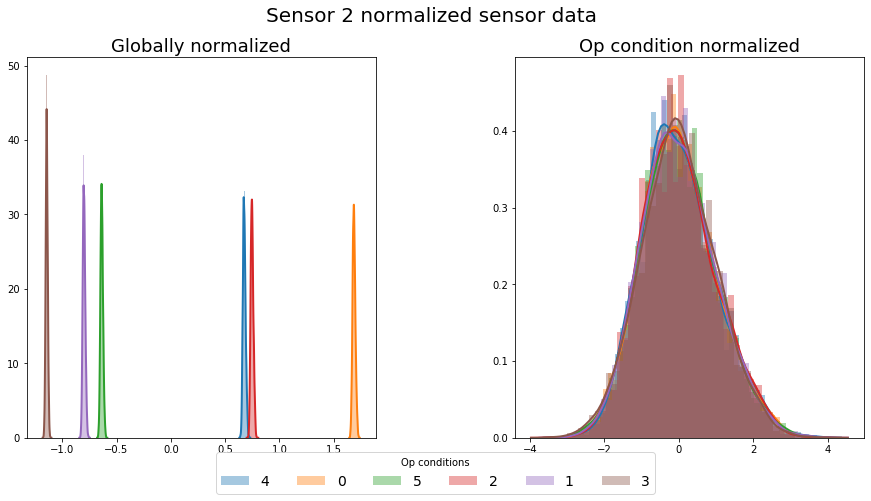

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize = (15,7))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
fig.suptitle('Sensor 2 normalized sensor data', size = 20)

# As an example, for a specific sensor
for op in train_scaled.op_cond.unique():
    sns.distplot(train_scaled[train_scaled.op_cond == op].sensor_2, ax = axes[0], axlabel=' ')
    sns.distplot(train_scaled_op[train_scaled.op_cond == op].sensor_2, ax = axes[1], axlabel=' ')
axes[0].set_title("Globally normalized")
axes[1].set_title("Op condition normalized")
fig.legend(train_scaled.op_cond.unique(), loc = "lower center", ncol = 6, title = "Op conditions");

- The operational conditions have huge impact in sensor values, as we see on the left figure, readings of  such feature lie on complete different value ranges.

- On the right side we cancel this variance, all values for sensor 2 are in the same range no matter the operation regime

Let's now see the effect on the normalized time series for a particular entity for some preselected sensors

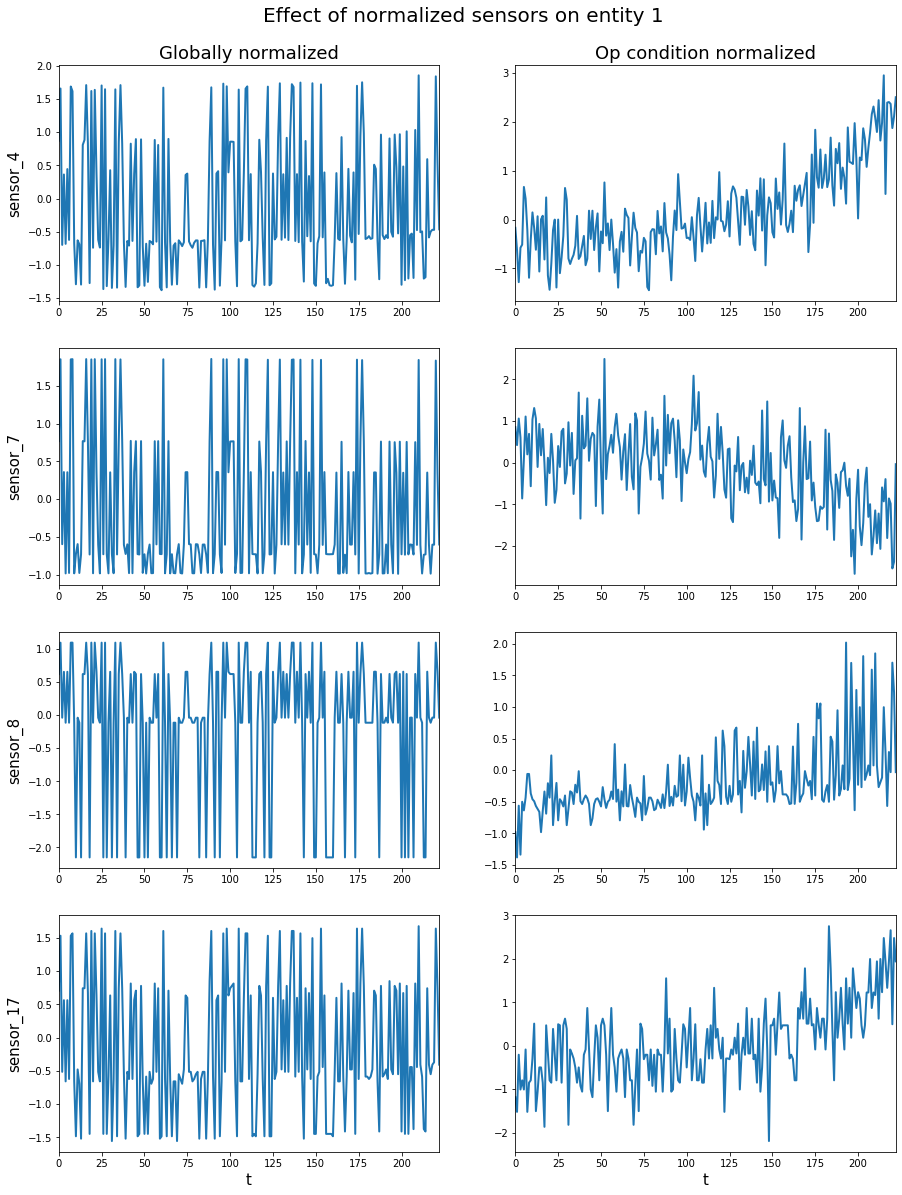

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize = (15,20))
fig.suptitle('Effect of normalized sensors on entity 1', y = 0.92, size =20)

selected_sensors= ['sensor_4','sensor_7','sensor_8','sensor_17']

for i,sensor in enumerate(selected_sensors):
    train_scaled.loc[train_scaled.unit_id == 1, sensor].plot(ax = axes[i,0])
    axes[i,0].set_ylabel(sensor)
    train_scaled_op.loc[train_scaled_op.unit_id == 1, sensor].plot(ax = axes[i,1])
    
axes[0,0].set_title("Globally normalized")
axes[0,1].set_title("Op condition normalized")
axes[-1,0].set_xlabel("t")
axes[-1,1].set_xlabel("t");

- Here we clearly see the effect of the different normalization strategies.
- The feature time series for the globally normalized show large variance which overwhelms the trend caused by system degradation over time.

- Transforming the data into a nominal range unveils the hidden trends of te degradation patterns.

It is important to say that, although what has been found with this normalization approach, prognostic algorithms using neural networks do not need this preprocessing step since it is expected that the NN itself is capable to unveil the trends hidden under different operation conditions.

From now on, data exploration wise, we will keep the operation condition normalized sensors since it will convey clearer messages.

## Data exploration

First let's have a look at the features.

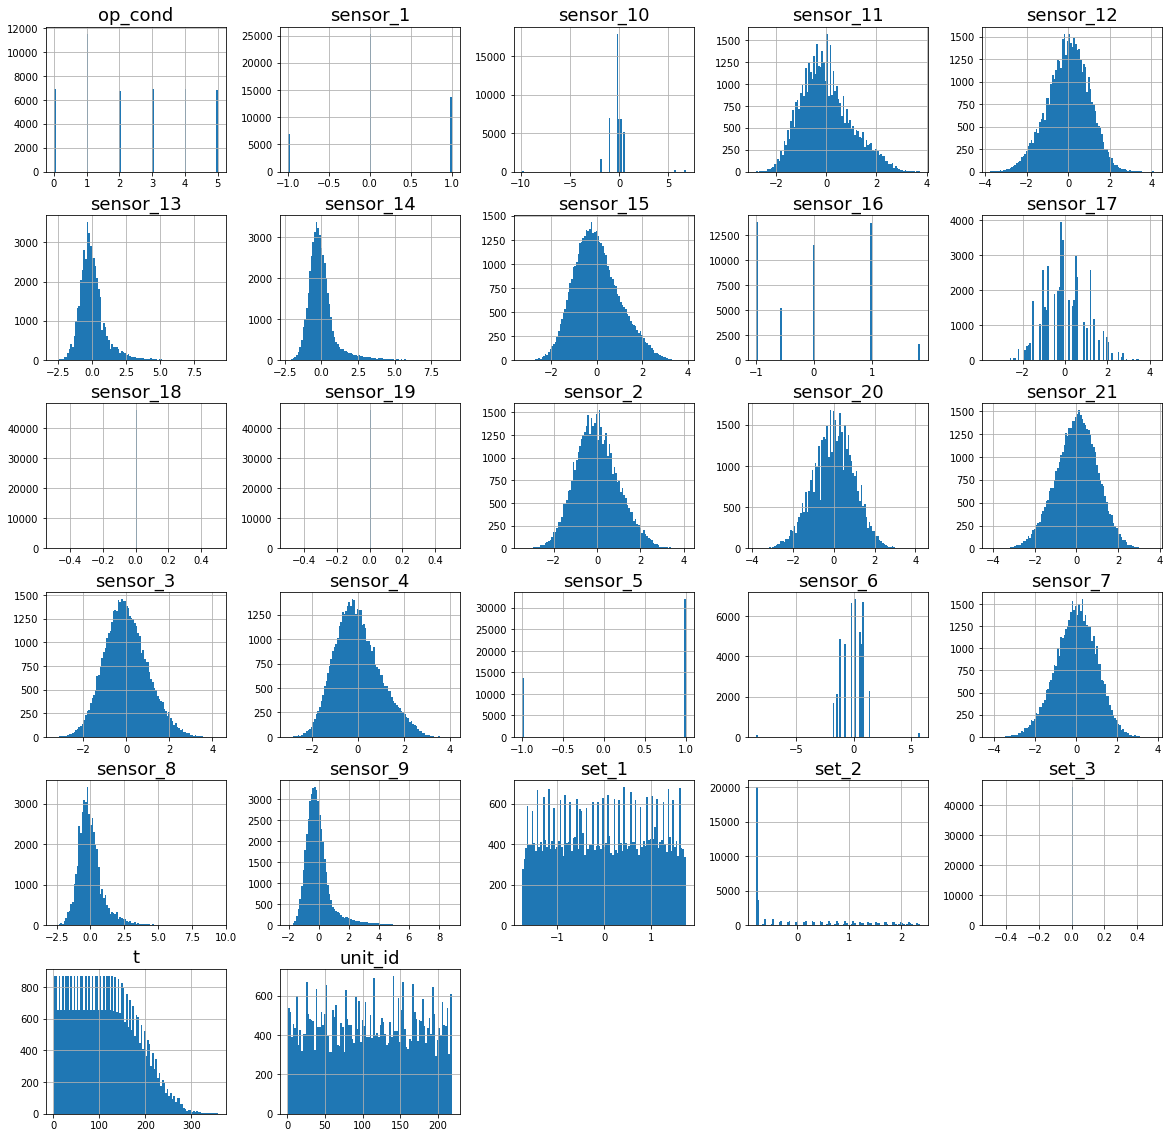

In [14]:
train_scaled_op.hist(bins = 100, figsize=(20,20));

 and check the statistics

In [15]:
train_scaled_op.describe()

,unit_id,t,set_1,set_2,set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,op_cond
count,45918.000000,45918.000000,4.591800e+04,4.591800e+04,45918.0,45918.000000,4.591800e+04,4.591800e+04,4.591800e+04,45918.000000,...,4.591800e+04,4.591800e+04,4.591800e+04,45918.000000,4.591800e+04,45918.0,45918.0,4.591800e+04,4.591800e+04,45918.000000
mean,109.396511,110.307396,3.388499e-13,1.314376e-15,0.0,0.146958,9.372393e-14,9.549417e-15,3.908155e-15,0.398362,...,-3.841407e-13,8.608588e-15,6.226804e-15,-0.002091,1.088143e-15,0.0,0.0,4.652153e-15,-1.525134e-15,2.342850
std,62.866193,68.420545,1.000011e+00,1.000011e+00,0.0,0.652014,1.000011e+00,1.000011e+00,1.000011e+00,0.917238,...,1.000011e+00,1.000011e+00,1.000011e+00,0.864881,1.000011e+00,0.0,0.0,1.000011e+00,1.000011e+00,1.683454
min,1.000000,1.000000,-1.758902e+00,-7.917253e-01,0.0,-1.000000,-3.462847e+00,-3.350193e+00,-3.036750e+00,-1.000000,...,-2.836870e+00,-2.281070e+00,-3.293088e+00,-1.000000,-3.536920e+00,0.0,0.0,-3.804128e+00,-4.166848e+00,0.000000
25%,54.000000,53.000000,-8.523236e-01,-7.747943e-01,0.0,0.000000,-7.001261e-01,-6.896467e-01,-7.087710e-01,-1.000000,...,-6.109803e-01,-5.731648e-01,-7.135411e-01,-1.000000,-7.939511e-01,0.0,0.0,-6.830653e-01,-6.581593e-01,1.000000
50%,110.000000,106.000000,-4.378087e-03,-7.598638e-01,0.0,0.000000,-5.833376e-02,-5.624027e-02,-9.572142e-02,1.000000,...,-1.502915e-01,-1.704791e-01,-9.090600e-02,0.000000,-8.443549e-02,0.0,0.0,2.296337e-02,3.461489e-02,2.000000
75%,164.000000,160.000000,8.781525e-01,7.738456e-01,0.0,1.000000,6.396013e-01,6.382235e-01,6.263503e-01,1.000000,...,3.783056e-01,3.085990e-01,6.310067e-01,1.000000,6.250801e-01,0.0,0.0,6.986772e-01,6.889866e-01,4.000000
max,218.000000,357.000000,1.743391e+00,2.346159e+00,0.0,1.000000,4.076087e+00,4.235872e+00,4.062493e+00,1.000000,...,9.198421e+00,8.891305e+00,3.888537e+00,1.822360,4.172658e+00,0.0,0.0,4.199124e+00,3.706183e+00,5.000000


-  After normalization, setting 3, sensor 18, sensor 19 are consistenly 0. This means that this sensors are fully characterized once we know the operation condition
- Sensor 1, sensor 5, sensor 10, and sensor 16 don't have mean 0 and sd 1 since, although the variables is continuous, is values in the data set are scattered around 6-10 values. May be could be treated as categorical variables?

### Time to failure distribution

How many cycles an engine usually works?

count    218.000000
mean     210.633028
std       43.595578
min      128.000000
25%      177.000000
50%      209.500000
75%      236.000000
max      357.000000
Name: t, dtype: float64

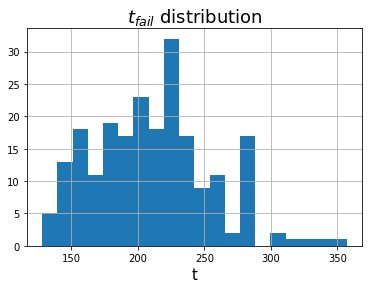

In [16]:
# t_fail distribution
t_fail =train_scaled_op.groupby(train_scaled_op.unit_id)['t'].max()
t_fail.hist(bins = 20)
plt.title('$t_{fail}$ distribution')
plt.xlabel('t')
t_fail.describe()

- Range between ~ 128 to ~ 360 cycles
- Skewed distribution
- Average around 210 cycles 

### Variable plotting

Let's visualize the time series for the sensors

As an example, we will pick one of the engines and plot all the sensors until its failure. This will allow us to have a general idea of how the data looks like.

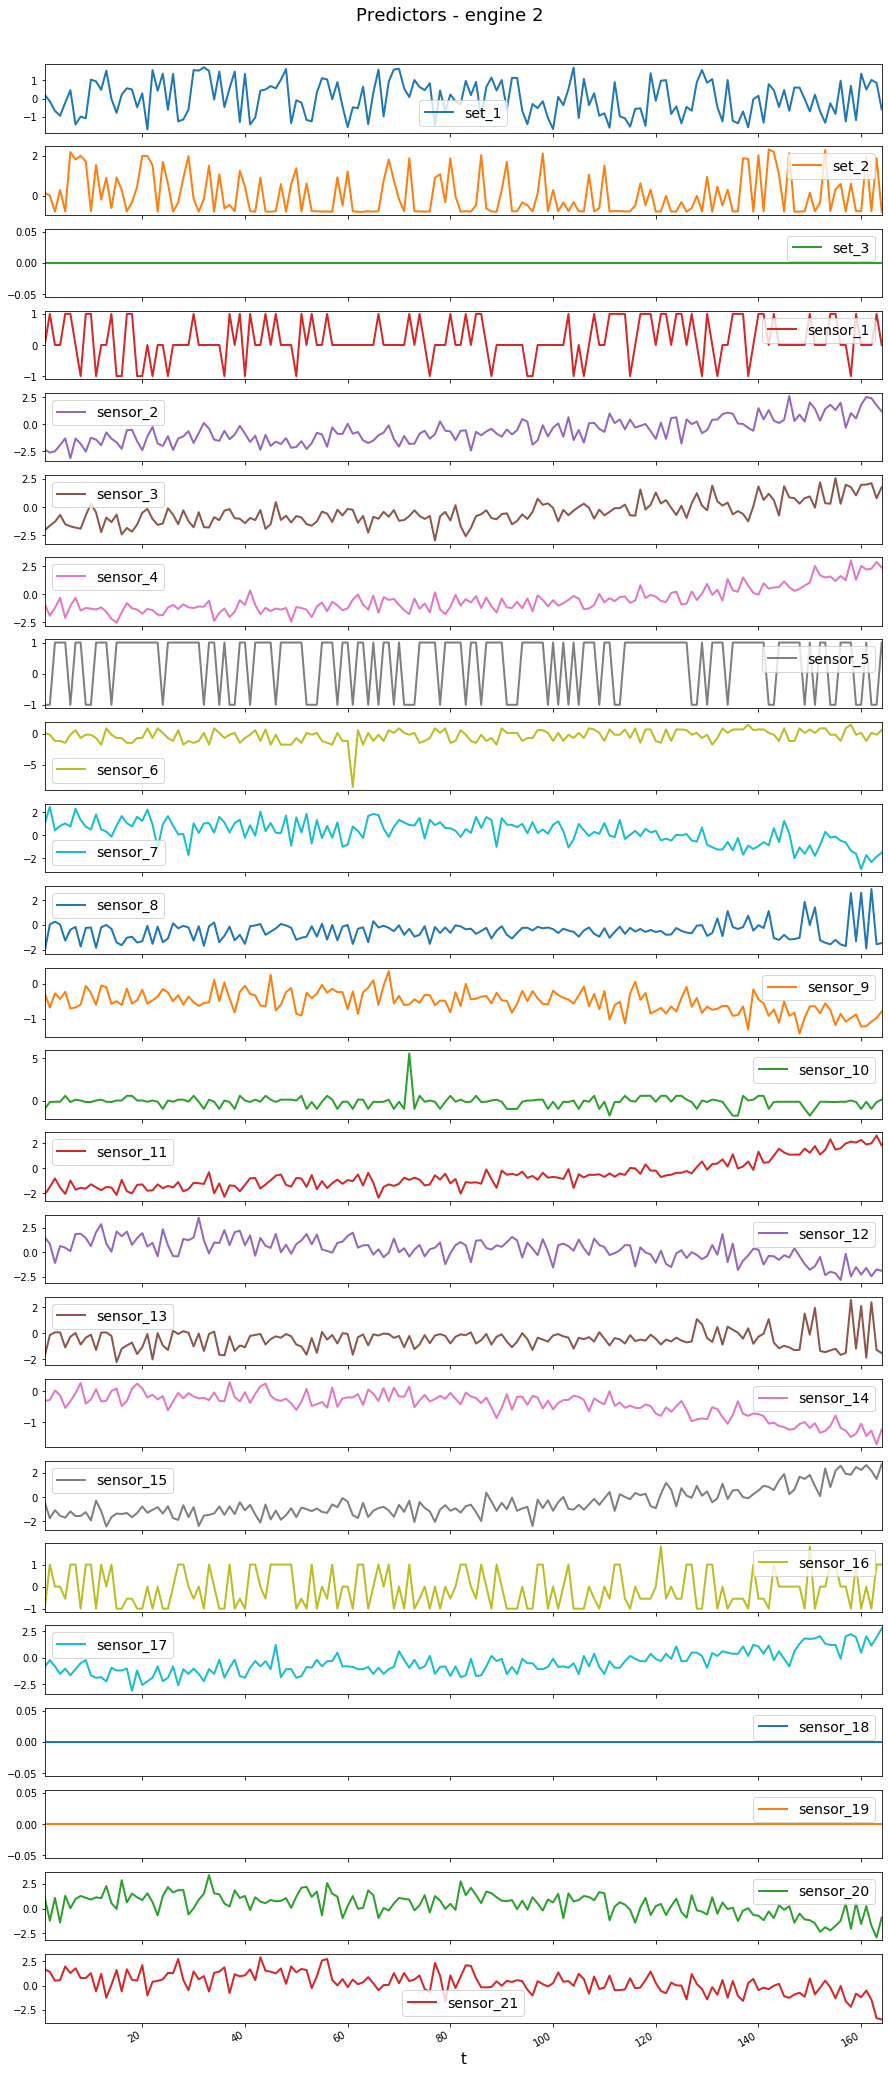

In [17]:
train_scaled_op.loc[train_scaled_op.unit_id == 2, np.concatenate((predictors.values,['t']))] \
    .set_index('t') \
    .plot(subplots=True, sharex=True, figsize=(15,40));
plt.suptitle("Predictors - engine 2", y = 0.90, size =18);

Exploratory impressions

-  Several sensors present a trend when $t_{fail}$ approaches.
- As seen in the previously, there are some sensors that present no variability once they have been scaled taking into account the operation regime.

### Variable correlation with t

In order to be able to assess which variables are more correlated with time to failure across all engine units, we are going to homogenize $t_{fail}$ from 0 to 1 for all engines.  0 meaning the start of the data recording and 1 meaning failure. 

Aftrwards wwe will check which are the most correlated variables with the homogenized $t_{fail}$.

In [18]:
# Create a variable that takes all t_fail from 0 to 1. 0 meaning the start of the data recording and 1 meaning failure
for unit_id in train_scaled_op.unit_id.unique():
    train_scaled_op.loc[train_scaled_op.unit_id==unit_id,'t_unit'] = train_scaled_op[train_scaled_op.unit_id == unit_id].t / train_scaled_op[train_scaled_op.unit_id == unit_id].t.max()

# In order to be able to compare, create bins of the previously created variable
train_scaled_op['bins'] = pd.cut(train_scaled_op.t_unit, bins = 100, labels = np.linspace(0,1,100) )

# Compute correlation between predictors and the created variable
most_corr = train_scaled_op.loc[:,predictors].corrwith(train_scaled_op.bins).abs().sort_values(ascending=False)
most_corr

sensor_11    0.720785
sensor_4     0.690428
sensor_15    0.670559
sensor_17    0.609602
sensor_2     0.588497
sensor_3     0.581663
sensor_12    0.493824
sensor_7     0.467132
sensor_13    0.465116
sensor_8     0.461846
sensor_21    0.448697
sensor_20    0.443243
sensor_9     0.438497
sensor_6     0.361327
sensor_14    0.348163
sensor_16    0.110091
sensor_10    0.035019
sensor_1     0.013512
sensor_5     0.003756
set_1        0.002807
set_2        0.001357
set_3             NaN
sensor_18         NaN
sensor_19         NaN
dtype: float64

- Correlations a descent amount of sensors are high!

Let's plot the most correlated predictors. 

For each sensor, we will plot all engines in one chart showing the mean and the +-sd.

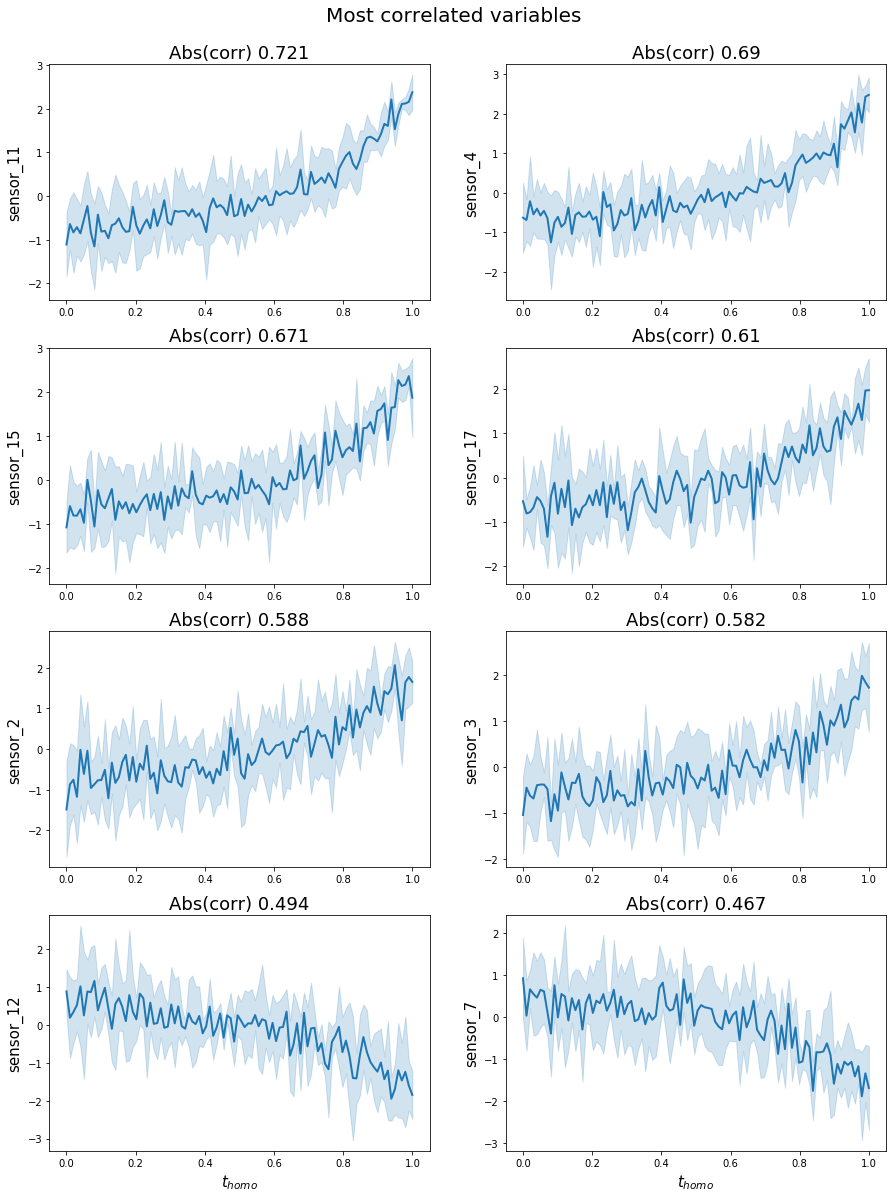

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize = (15,20))
fig.suptitle('Most correlated variables', y = 0.92, size =20)

for ax, predictor, correlation in zip(axes.flatten(), most_corr.index, most_corr.values):
    sns.lineplot(x = 'bins', 
                 y = predictor,
                 data = train_scaled_op[train_scaled_op.unit_id <4],
                 ci = 'sd',
                 ax = ax)
    ax.set(title = f'Abs(corr) {np.round(correlation,3)}')  
    ax.set_xlabel(' ')

ax.set_xlabel(' ')
axes[-1,0].set_xlabel("$t_{homo}$")
axes[-1,1].set_xlabel("$t_{homo}$");

- Here we confirm the trend when approaching to 1 (failure)

### Variable correlation among them

Let's now check which are the most correlated variables among them.

In order to have a valid correlation number between variables, since some engines last more than others, we are going to make use again of the $t_{homo}$ computed before. 

We are going to aggregate (mean) the values for a specific engine in a specific $t_{homo}$ so we have the same number of samples for each engine. 

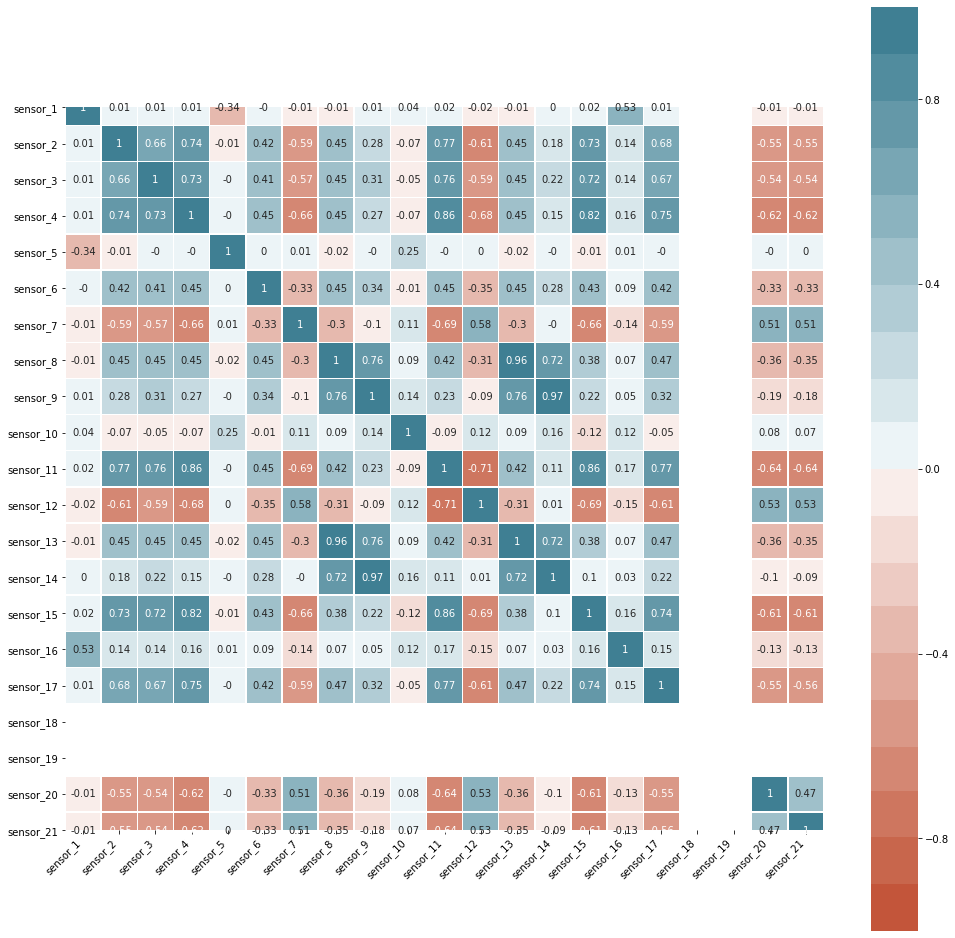

In [20]:
# Grouping by unit_id and t_homo and computing correlation
corr = np.round(train_scaled_op.groupby(['unit_id','bins']).mean()[sensors].corr(),2)

# Plotting
plt.figure(figsize=(17, 17))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=20),
    annot = True,
    annot_kws={"size": 10},
    linewidths=.5,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- There are some highly correlated sensors that, most probably, one of them would drop out if we would do any variable selection method. 

### Other: Feature engineering

Depending on the method used for RUL prediction, this has lower relevance. (i.e. NN) The traditional predictive maintenance machine learning models are based on feature engineering leading to manual construction of variable using domain expertise and intuition. This usually makes these models hard to reuse as the features are specific to the problem scenario and the available data may vary between these problems. 

Perhaps the most attractive advantage of deep learning is that they automatically do feature engineering from the data, eliminating the need for the manual feature engineering step.

Some ides for feature engineering are: 

- Rolling windows aggregates
- Lagged variables
- ...?